In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.target.value_counts()

,count
target,
1,526
0,499


In [ ]:
# independent , dependent variable
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=50)

In [ ]:
dt= DecisionTreeClassifier(max_depth=6)  # criterion= 'gini' by default

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred= dt.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.914396887159533

In [ ]:
confusion_matrix(y_test, y_pred)

array([[110,   7],
       [ 15, 125]])

In [ ]:
precision_score(y_test, y_pred)

0.946969696969697

In [ ]:
recall_score(y_test, y_pred)

0.8928571428571429

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
import matplotlib.pyplot as plt

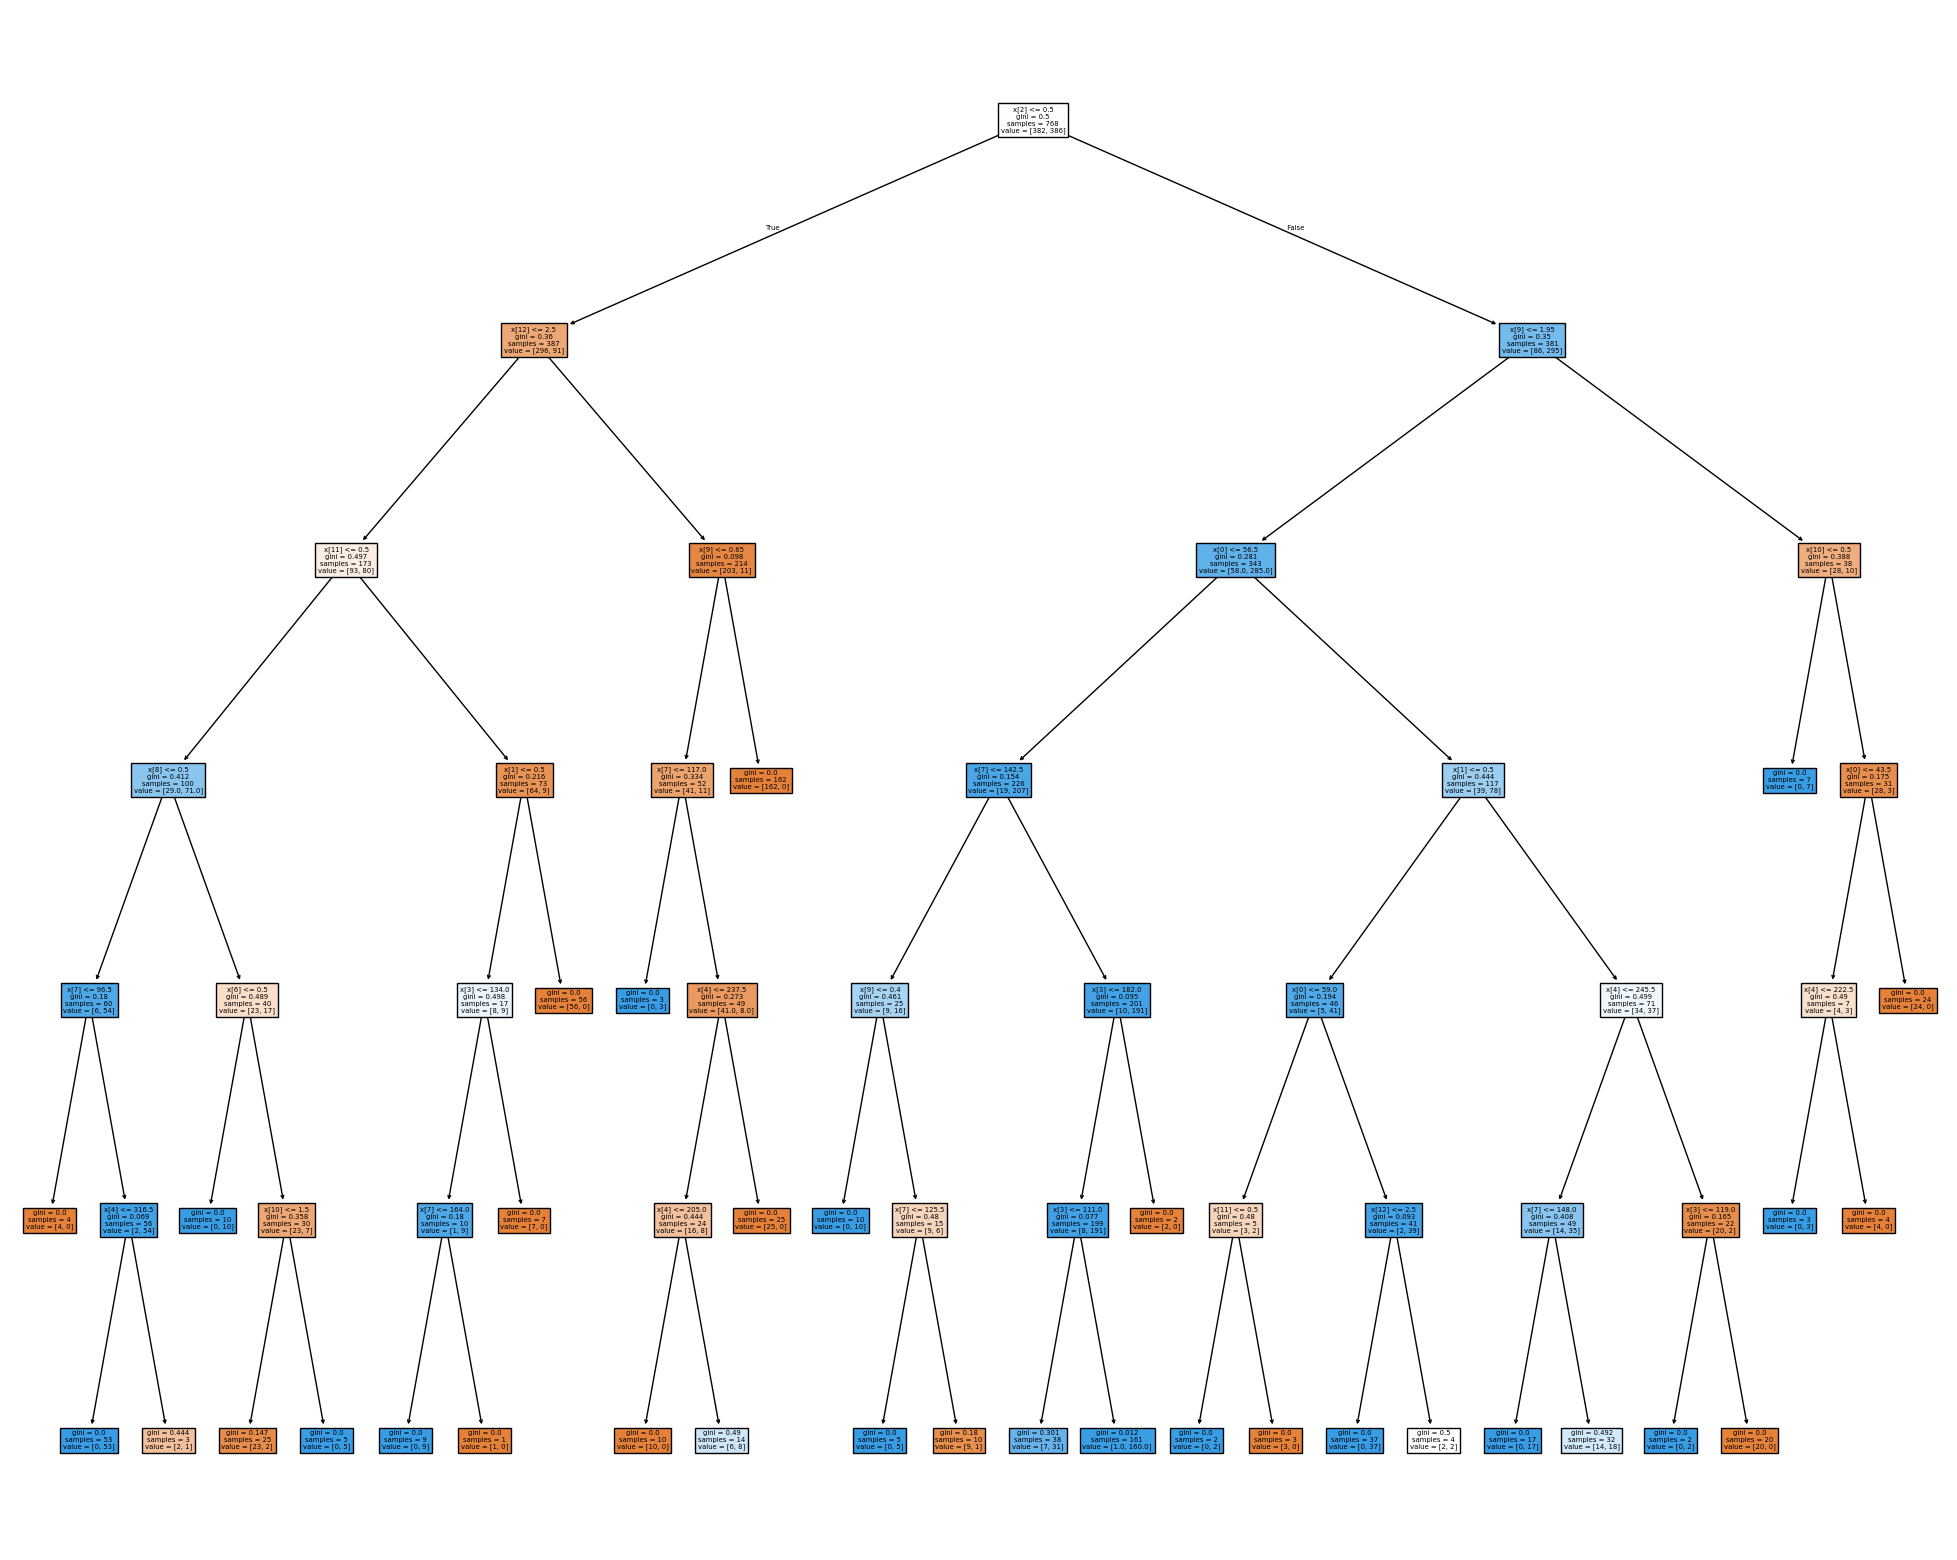

In [ ]:
plt.figure(figsize=(25,20))
fig=plot_tree(dt, filled=True)
plt.show()

In [ ]:
# pre-pruning

In [ ]:
# Cross Validation - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model= DecisionTreeClassifier()

In [ ]:
params={
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9,10,11]
}

In [ ]:
cv= GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')

In [ ]:
cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [ ]:
tree= DecisionTreeClassifier(criterion='gini',max_depth=9)


In [ ]:
# tree.fit(x_train, y_train)
# y_pred= tree.predict(x_test)